In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03_apple.ipynb")

# Homework 3: Text Analysis of Bloomberg Articles

## Data Cleaning and EDA

### Due Date: Thursday, September 26, 11:59 PM

You must submit this assignment to Gradescope by the on-time deadline, **Thursday, September 26**, at 11:59 PM. Please read the syllabus for the Slip Day policy. No late submissions beyond what is outlined in the Slip Day policy will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance.

Please read the instructions carefully when submitting your work to Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** below.


**Collaborators**: _list collaborators here_


## This Assignment

Welcome to Homework 3! For this assignment, we will work with Bloomberg news articles on Apple and Apple stock data (AAPL).

In this assignment, you will gain practice with:

- Conducting data cleaning and EDA on a text-based dataset,
- Manipulating data in `pandas` with the `datetime` and `string` accessors,
- Analyzing seaborn visualizations to better understand our data,
- Writing regular expressions and using `pandas` RegEx methods, and
- Performing sentiment analysis on text using DistilBERT.


In [2]:
# Run this cell to set up your notebook. 
import warnings
warnings.simplefilter(action="ignore")

import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ds100_utils import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full articles.
pd.set_option("max_colwidth", 280)
plt.style.use("fivethirtyeight")
sns.set()
sns.set_context("talk")

In this assignment, we will use the DistilBERT model, which is a Natural Language Processing (NLP) model designed to understand human language by processing text to capture the context and meaning of words within sentences. You are not expected to know the details of the model, but we will use it in this homework to perform sentiment analysis on textual data. We are importing those tools and the corresponding model below. **If you see any warnings, please ignore them. As long as the cell runs, there shouldn't be any issues.**

## IMPORTANT NOTE

Due to a finite amount of computing resources on DataHub, the cell below **may take a long time to run** (easily a couple minutes). This may also apply to other cells later in the assignment that load and use the NLP model. 

**Please be patient**, wait, and **avoid restarting the kernel or rerunning these cells** more than necessary. Not only will doing so make *your* notebook run slower, it can also affect *other students* on your CPU cluster. 

In addition, do NOT open this assignment in multiple tabs or windows. It can cause your notebook to crash, as well as affect Datahub. 

Please be patient and come to Office Hours or ask on Ed if you have any issues!

In [3]:
from transformers import pipeline
model_checkpoint = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

2024-09-27 00:44:14.628989: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 00:44:14.666474: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Score Breakdown

Question | Manual| Points
--- |---| ---
1a |No| 1
1b |No| 1
1c |No| 1
2ai |No| 2
2aii |No| 1
2b |No| 2
2c |No| 1
2di |No| 1
2dii |Yes| 1
3a |No| 1
3bi |No| 1
3bii |No| 1
3c |Yes| 1
3d |Yes| 1
3ei |No| 1
3eii | Yes | 1
**Total** | **4** | **18**

## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question.

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests on Gradescope after the grades are released.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.

### Debugging Guide

If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Datahub, Gradescope, and common `pandas` and RegEx errors.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data

The data for this assignment is a subset of the financial news dataset from [this github repo](https://github.com/philipperemy/financial-news-dataset). The original datasets are no longer available online due to copyright issues, but we were allowed access for educational purposes. The data in the file `data/bloomberg_news.txt` has been filtered to just Bloomberg articles published between 2010 to 2013 (inclusive) with text that contains mentions of various popular stocks.


<br>

---

### Question 1a

Let's examine the contents of the `data/bloomberg_news.txt` file. Using the [`open` function](https://docs.python.org/3/library/functions.html#open) and [`read` operation](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) on a `python` file object, read **the first 1000 characters** in `data/bloomberg_news.txt` and store your result in the variable `q1a`. Then, display the result so you can read it.

**CAUTION: Viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file.**


In [4]:
q1a = open("data/bloomberg_news.txt").read(1000)
print(q1a)

[{"id":46243185,"title":"Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover","released_at":"<date>May 29 2012<\/date> <time>09:40:58<\/time>","content":"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website  Pocket-Lint  reported that  Facebook Inc. (FB) \nmay try to acquire the company.  Opera gained as much as 26 percent, the biggest jump since\nit first sold shares in 2004. The Oslo-based company rose 18\npercent to 40.5 kroner at 11:37 a.m., giving it a market value\nof 4.85 billion kroner ($807 million).  Opera is the last major independent browser left, with the\nothers owned by companies such as  Microsoft Corp. (MSFT) ,  Google Inc. (GOOG)  \nand  Apple Inc. (AAPL) , said Aleksander Nilsen, an analyst at Abg Sundal\nCollier in Oslo. The company has a strong balance sheet, and\ncould be an attractive target for other companies, such as\n Mountain View , California-based Google, he said.  

In [5]:
grader.check("q1a")

q1a results: All test cases passed!

<br>

---

### Question 1b

Based on the printed output you got from `q1a`, what format is the data in? Answer this question by entering the letter corresponding to the right format in the variable `q1b` below.

**CAUTION: As a reminder, viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file, and do not use the file explorer to open data files directly.**

**A.** CSV<br/>
**B.** HTML<br/>
**C.** JavaScript Object Notation (JSON)<br/>
**D.** Excel XML

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.


In [6]:
q1b = "C"

In [7]:
grader.check("q1b")

q1b results: All test cases passed!

<br>

---

### Question 1c

`pandas` has built-in readers for many different file formats, including the file format used here to store news articles. To learn more about these, check out the documentation for

- `pd.read_csv` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- `pd.read_html`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)
- `pd.read_json`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
- `pd.read_excel`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

For this question, use one of these functions to:
1. Load the file `bloomberg_news.txt` in the data folder as a `DataFrame` into the variable `news_df`.
2. Set the **index** of `news_df` to correspond to the `id` of each news article.


**Hint:** If your code is taking a while to run, you should review your answers to `q1a` and `q1b`; you may have used the incorrect data loading function for the type of the given file.

In [8]:
news_df = pd.read_json("data/bloomberg_news.txt")
news_df = news_df.set_index("id")
news_df.head(1)

,title,released_at,content,path
id,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt


In [9]:
grader.check("q1c")

q1c results: All test cases passed!

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 2: Time Analysis

After loading in the data, we can start exploring news articles by analyzing the relationships between the release dates (date of publication) and different topics and companies.

<br>


---

### Question 2a, Part i

First, let's extract the date and time from the `released_at` column in `news_df`. Notice that the date and time are encoded in the following format:

```
<date>May 29 2012</date> <time>09:40:58</time>
<date>May 18 2011</date> <time>22:42:40</time>
<date>August 15 2012</date> <time>00:09:02</time>
<date>July 1 2011</date> <time>22:12:37</time>
...
```

There are several ways to convert this to a `Timestamp` object that we can use more easily. However, for this assignment, we are going to use string manipulation functions. 

Create a regular expression that extracts the Month, Day, Year, Hour, Minute, and Second from the `news_df["released_at"]` column. You should create a new `DataFrame` called `dates` that contains:
1. The same index as `news_df` (`id`) and
2. Column labels: `"Month"`, `"Day"`, `"Year"`, `"Hour"`, `"Minute"`, `"Second"`.

Additionally, convert all numerical values (`"Year"`, `"Day"`, `"Hour"`, `"Minute"`, `"Second"`) to type `int`.

**Hint 1:** You should use the `Series.str.extract` function ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html)).

**Hint 2:** Don't forget to use raw strings and capture groups. Copy the above example text into [regex101.com](https://regex101.com/) to experiment with your regular expressions.

**Hint 3:** It might be helpful to break this up into a couple of steps (e.g., first extract date values such as Month, Day, and Year and then extract time values such as Hour, Minute, and Second).

In [10]:
dates = pd.DataFrame(news_df)
regex_pattern = r'<date>([a-zA-Z]+) (\d{1,2}) (\d{4})<\/date>\s<time>(\d{2}):(\d{2}):(\d{2})<\/time>'


dates = news_df["released_at"].str.extract(regex_pattern)
dates.columns = ["Month", "Day", "Year", "Hour", "Minute", "Second"]
dates[["Day", "Year", "Hour", "Minute", "Second"]] = dates[["Day", "Year", "Hour", "Minute", "Second"]].astype(int)
dates

,Month,Day,Year,Hour,Minute,Second
id,,,,,,
46243185,May,29,2012,9,40,58
73522879,May,18,2011,22,42,40
29296500,August,15,2012,0,9,2
49799724,July,1,2011,22,12,37
20739032,January,18,2012,1,20,28
...,...,...,...,...,...,...
75325873,June,27,2012,0,35,58
49071474,September,24,2013,13,38,57
12417018,September,14,2011,4,1,0


In [11]:
grader.check("q2ai")

q2ai results: All test cases passed!

### Question 2a, Part ii

Now that we extracted the dates and stored them into the `dates` Dataframe, let's merge `dates` with `news_df` so that we examine the trends in `news_df`over time. Assign `news_df_dates` to the merged dataframe.

**Hint:** Use pd.merge [documentation]() to merge two dataframes. In order to pass the tests, `news_df` should be the *left* dataframe and `dates` should be the *right* dataframe.

In [12]:
news_df_dates = pd.merge(news_df, dates, right_index = True, left_index = True, how = "inner")
news_df_dates

,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second
id,,,,,,,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt,May,29,2012,9,40,58
73522879,Microsoft Calls Intel’s Comments on Next Windows ‘Inaccurate’,<date>May 18 2011</date> <time>22:42:40</time>,"Microsoft Corp. (MSFT) said comments made by\nan Intel Corp. (INTC) executive yesterday about future version of its\nWindows operating system were “factually inaccurate and\nunfortunately misleading.” Renee James, head of Intel’s software business, said\nyesterday that Mi...",./2008_2012_msft_bloomberg_news/icrosoft-calls-intel-s-comments-on-next-windows-inaccurate-.txt,May,18,2011,22,42,40
29296500,Lawyers Raking in Cash as Campaign Spending Hits Records,<date>August 15 2012</date> <time>00:09:02</time>,"Every four years, a new mix of politicians assembles to compete for the opportunity to run for president. While the candidates’ names and faces change, the lawyers stay the same. Attorney Michael Toner began his presidential-campaign legal career in 1996 working for Republic...",./2008_2012_msft_bloomberg_news/awyers-raking-in-cash-as-campaign-spending-hits-records.txt,August,15,2012,0,9,2
49799724,"Microsoft, Google Sued by Louisiana Firm Over Computer-Mapping Technology",<date>July 1 2011</date> <time>22:12:37</time>,"Microsoft Corp. (MSFT) and Google Inc. (GOOG) were\naccused of violating a Louisiana company’s patent covering\nmapping technology that helps computer users see locations in\nthree dimensions. Officials of Transcenic Inc. contend in a lawsuit that\nexecutives of Google,...",./2008_2012_msft_bloomberg_news/icrosoft-google-sued-over-technology-providing-computer-maps.txt,July,1,2011,22,12,37
20739032,Yahoo Co-Founder Jerry Yang Exits Company,<date>January 18 2012</date> <time>01:20:28</time>,"Jerry Yang is exiting the Yahoo!\nInc (YHOO) . board and its management team, the latest casualty of an\noverhaul that led to the ouster of Chief Executive Officer Carol\nBartz and left the company in search of strategic options. Yang, who started Yahoo in 1995 with Dav...",./2008_2012_msft_bloomberg_news/yahoo-says-co-founder-jerry-yang-resigns.txt,January,18,2012,1,20,28
...,...,...,...,...,...,...,...,...,...,...
75325873,Dolby to Purchase San Francisco Tower for $109.8 Million,<date>June 27 2012</date> <time>00:35:58</time>,"Dolby Laboratories Inc. (DLB) , the audio-\ntechnology company whose products are used in cinemas, recording\nstudios and video games, agreed to buy a 16-story tower in the\n San Francisco area that’s home to Twitter Inc., and will make\nthe building its new headquarters. T...",./2008_2012_msft_bloomberg_news/dolby-to-purchase-san-francisco-tower-for-109-8-million.txt,June,27,2012,0,35,58
49071474,Mayfair Office Squeeze Spawns New London Real Estate Hubs,<date>September 24 2013</date> <time>13:38:57</time>,"Mayfair and St. James’s just aren’t\nbig enough for all the companies that want a piece of London’s\nmost expensive neighborhoods. Many are now settling for less\nprestigious city-center addresses, creating new hot spots in the\noffice-property market. Buildings are sproutin...",./2008_2012_msft_bloomberg_news/ayfair-office-squeeze-spawns-new-london-real-estate-hubs.txt,September,24,2013,13,38,57
12417018,Only Half of U.S. Corporate Cash Stays at Home: Chart of the Day,<date>September 14 2011</date> <time>04:01:00</time>,"Cash levels for U.S. companies are\nlosing their meaning for the country’s economy because so much\nof the money is held elsewhere these days, according to Dane Mott, a JPMorgan

In [13]:
grader.check("q2aii")

q2aii results: All test cases passed!

<br>

---

### Question 2b

Now, let's analyze articles about different topics and companies.


For each company in the list of `companies` (provided below), add a boolean column to the `news_df` `DataFrame` indicating whether the corresponding company is mentioned in the `"content"` of the article. Ultimately, you should add six new columns containing `True`/`False` values to the `DataFrame`: `"amazon"`, `"nintendo"`, `"apple"`, `"sony"`, `"facebook"`, `"netflix"`. You may use a for loop over the list of companies.

**Note:** Make the contents of the articles lowercase before searching for the keywords.

In [14]:
companies = ["amazon", "nintendo", "apple", "sony", "facebook", "netflix"]

news_df["content"] = news_df["content"].str.lower()



for company in companies:
    news_df[company] = news_df["content"].str.contains(company)

news_df.head(1)

,title,released_at,content,path,amazon,nintendo,apple,sony,facebook,netflix
id,,,,,,,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"opera software asa (opera) , the norwegian\nmarker of internet browsers, surged the most on record in oslo\nafter technology website pocket-lint reported that facebook inc. (fb) \nmay try to acquire the company. opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt,False,False,True,False,True,False


In [15]:
grader.check("q2b")

q2b results: All test cases passed!

<br>

---

### Question 2c

Now, we can put everything together to analyze the release dates and volume of articles for different companies.

Create a new `DataFrame` called `company_mentions` that contains the number of articles mentioning each company in the list `companies` after 2010 (inclusive). `company_mentions` should have six columns (one column for each company), and the index of this `DataFrame` should be the release year `"Year"`.

In [16]:
company_mentions = pd.merge(news_df, news_df_dates, right_index = True, left_index = True, how = "inner").query("Year >= 2010").set_index("Year")
company_mentions = company_mentions[["amazon", "nintendo", "apple", "sony", "facebook", "netflix"]].groupby("Year").agg(sum)

company_mentions.head()

,amazon,nintendo,apple,sony,facebook,netflix
Year,,,,,,
2010,41,28,190,55,74,9
2011,101,29,477,104,158,43
2012,179,44,766,97,271,40
2013,152,93,687,196,238,51


Given your code in the previous part is correct, after running the cell below, you should be able to see the number of articles released mentioning `companies` for each year. The plot should look like this:
<center>
<img src = "images/num_articles.png" width = "500">
</center>

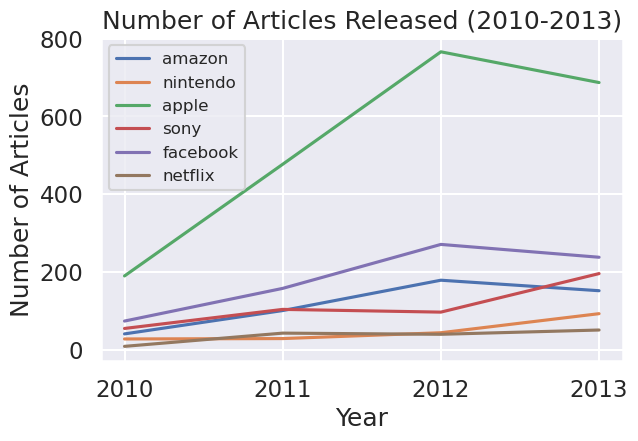

In [17]:
plt.figure(figsize=(6, 4))

for company in companies:
    sns.lineplot(data=company_mentions.reset_index(),
                 x="Year",
                 y=company,
                 label=company)
plt.legend(fontsize="12")
plt.xticks(np.arange(2010, 2014), np.arange(2010, 2014))
plt.ylabel("Number of Articles")
plt.xlabel("Year")
plt.title("Number of Articles Released (2010-2013)");

In [18]:
grader.check("q2c")

q2c results: All test cases passed!

---
### Question 2d
This graph is pretty interesting! Since Apple seems to have high rates of mentions in Bloomberg articles, let's examine Apple more closely. 

Let's start by loading the stock data for Apple into a `Dataframe` called `aapl_stock`. The stock data is stored in `data/aapl_stock_daily.csv`. We can use visualizations to further explore this data.

Run the cell below to load in the data, and see what the `Dataframe` contains.

In [19]:
aapl_stock = pd.read_csv("data/aapl_stock_daily.csv")
aapl_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461978,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358410,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


#### Question 2d, Part i
Change the datatype of Date column to be datetime, and set the index to the Date column. Then filter `aapl_stock` to only contain stock data from 2010 to 2013 (inclusive) so we can compare it to our data in part 2c.

**Hint:** consider using `pd.to_datetime` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html))

In [20]:
aapl_stock["Date"] = pd.to_datetime(aapl_stock['Date'])
aapl_stock.set_index("Date", inplace = True)
aapl_stock = aapl_stock["2010":"2013"]

aapl_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461978,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358410,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


#### Visualizing

Now that `aapl_stock` is in the correct format, you should be able to visualize trends within the AAPL stock over time. Using `seaborn` we have provided code below that creates a line plot using `aapl_stock`, with the column `Close` as the y-axis and `Date` as the x-axis. Note how we always make sure to label our plot and axis!

Run the cell below to display the plot.

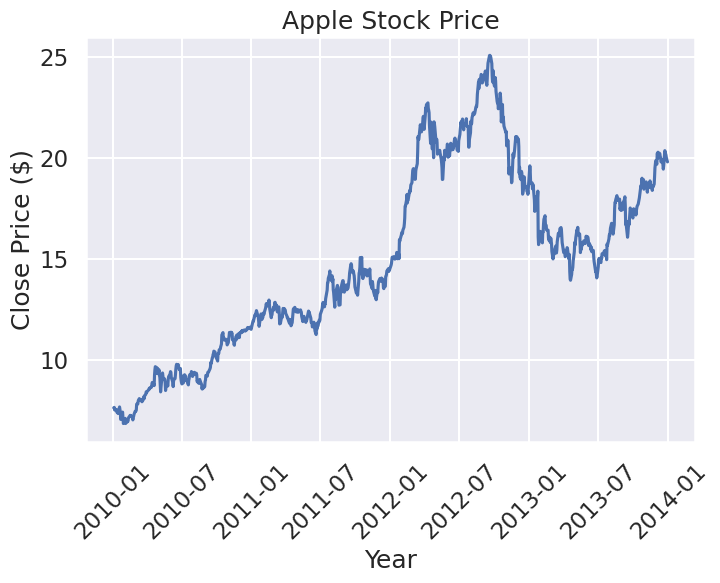

In [21]:
# Run this cell, no further action needed here.

plt.figure(figsize=(7,5))
sns.lineplot(data=aapl_stock.reset_index(), x='Date', y='Close')
plt.title('Apple Stock Price')
plt.ylabel('Close Price ($)')
plt.xlabel('Year');
plt.xticks(rotation=45)

plt.show()

<!-- BEGIN QUESTION -->

#### Question 2d, Part ii

Compare the plot above to the plot in Question 2c to better understand the history of Apple stock.

<img src = "images/num_articles.png" width = "350"> <img src = "images/aapl_stock.jpg" width = "350">

Does any specific year in the graphs stand out to you? Use a search engine search to explain at least one relevant event that could correspond to the time period you're curious about.

**Hint:** Consider using the filtering capabilities of your search engine to narrow down your results (ex: only view articles that were published from 2011 to 2013).

In 2012, a notable surge was observed in the number of articles mentioning Apple, coinciding with significant activity in Apple’s stock prices. These phenomena are attributed to several key events during the year, which are captured distinctly in two different graphs. The first graph shows a spike in articles, while the second graph correlates to Apple’s stock price movements.

**Number of Articles:**
In 2011, Apple was embroiled in a high-profile legal battle with Samsung, culminating in a three-week trial that captivated public interest. The trial unearthed a trove of corporate secrets, including prototype designs of the iPhone and iPad, as well as internal emails and presentations from both companies. The jury’s decision in 2012 largely favored Apple, ruling that Samsung had infringed on Apple’s patents, leading to considerable media coverage. This extensive media focus likely fueled the increase in articles throughout 2011 and into 2012, reaching a peak as the trial concluded.

**Apple Stock Price:**
The year 2012 was significant for Apple not only due to its legal victories but also for its product launches, particularly the release of the iPhone 5. This launch saw Apple’s stock prices initially soar, though the gains were not sustained, and prices began to decline afterward. Additionally, in March 2012, Apple announced a plan to initiate dividends and a $10 billion stock buyback program. Such financial decisions often spark investor enthusiasm, as they promise direct returns on investment. The announcement was well-received, leading to a temporary rally in stock prices as the market reacted positively to Apple’s strategies for utilizing its substantial cash reserves.


<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 3: Sentiment Analysis

In this section, we will continue building on our past analysis and specifically look at the **sentiment of each article** —— this will lead us to a much more direct and detailed understanding of how these articles can be used in different applications. **Sentiment analysis** is generally the computational task of classifying the emotions in a body of text as positively or negatively charged.


We will use a fine-tuned version of the **DistilBERT** model ([github](https://github.com/huggingface/transformers/tree/main/examples/research_projects/distillation), [original paper](https://arxiv.org/abs/1910.01108)) to analyze the sentiment of Bloomberg news articles. DistilBERT is a neural network-based language model (a close relative to ChatGPT); we will use the model checkpoint specifically trained for sentiment analysis. These models are not in scope for Data 100, and we don't expect you to know how they work; take CS182: Neural Networks or Data 102: Data, Inference, and Decisions if you're interested in learning more. We are using them here to show how easy (and useful) these technologies have become.

We can use the [HuggingFace library](https://huggingface.co/) to build the sentiment analysis pipeline and load the model. [Here](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english) is the card of the model checkpoint we will use for this assignment: the model card contains general information about the model, including the base model used, training arguments, training data, etc. Again, you don't need to know this for the course but knowing about model cards is important when you start to use these techniques in your careers.

Run the following two cells to set up the sentiment analysis pipeline and see examples of how we can get the sentiment for different strings.

In [23]:
# Load the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_checkpoint)

# Get the sentiment of a given string
sentiment_1 = sentiment_analysis("I have two dogs.")
print("Example 1: " + str(sentiment_1))

sentiment_2 = sentiment_analysis("I do not have dogs.")
print("Example 2: " + str(sentiment_2))

sentiment_3 = sentiment_analysis("Fortunately, I do not have dogs to worry about.")
print("Example 3: " + str(sentiment_3))

Example 1: [{'label': 'POSITIVE', 'score': 0.9955033659934998}]
Example 2: [{'label': 'NEGATIVE', 'score': 0.9987561702728271}]
Example 3: [{'label': 'POSITIVE', 'score': 0.9975079298019409}]


As you can see, the model can determine the sentiment of phrases/sentences (not just words). The model measures the phrase's **polarity**, indicating how strongly negative or positive it is on a scale of 0 to 1.

**Note:** The output is a list, and each element of the list is a dictionary with two keys (label and score). Note that we could have gotten the sentiments of the two sentences by putting them in a list (batch) and then running the pipeline once (see the code below).


In [24]:
sentiments = sentiment_analysis(["I have two dogs.", "I do not have dogs."])
print(sentiments)

[{'label': 'POSITIVE', 'score': 0.9955033659934998}, {'label': 'NEGATIVE', 'score': 0.9987561702728271}]


---
### Question 3a

Try it out yourself! The sentences we provided in the previous example have pretty high polarity scores. Let's see how the model behaves with more ambiguous sentences.

Write a sentence `less_polar_sentence` that has a polarity score less than 0.8. This may take some trial and error. Let this be an opportunity to think about whether the model works as you'd expect.

In [137]:
less_polar_sentence = ["I'm still working on the homework."]
results = sentiment_analysis(less_polar_sentence)
print(results)

[{'label': 'POSITIVE', 'score': 0.6615891456604004}]


In [133]:
grader.check("q3a")

q3a results: All test cases passed!

<br>

---

### Question 3b

As running all the articles through the model will take a while, let's filter our articles to only look at articles about Apple. We currently have Bloomberg articles about all stocks and the dates of the respective articles in `news_df_dates`, so we'll need to filter this in part i.


Due to model input size constraints, a maximum of 512 words (tokens), and limited computational resources on Datahub, we cannot load the full articles into the pipeline. Instead, we can look at the article headlines that mention Apple.

#### Question 3b, Part i

Assign `apple_re` to a regular expression that matches headlines referencing "apple" or "aapl" (in lowercase, as we will be following the common practice to lowercase text before searching for matches).

You should develop and test your regular expression using [regex101.com](https://regex101.com/). Here are some practice sentences.

```
Sales of Macs and iPads Lead Apple’s Quarterly Revenue Up 5%
```
```
Apple Jumps Into A.I. Fray With Apple Intelligence
```


Then:
1. Canonicalize the `"title"` of the articles by converting the text to lowercase,
2. Use the `apple_re` regular expression to only include rows that have titles that match `apple_re`
3. Assign the filtered rows to `aaple_news_title`


**Hint 1:** `Series.str.contains` function might be useful 

**Hint 2:** Consider using non-capturing groups, which allows you to group entire subexpressions `r"(:?\subexpression1 | \subexpression2)"`

In [68]:
apple_re = r'(apple| aapl)'
news_df_dates["title"] = news_df_dates["title"].str.lower()
aapl_news_title = news_df_dates["title"].str.contains(apple_re)
aapl_news_title = news_df_dates[aapl_news_title]

aapl_news_title.head(1)

,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second
id,,,,,,,,,,
66299939,elevation’s mcnamee says apple is winning all profit in mobile,<date>March 29 2012</date> <time>23:30:57</time>,"Technology investor Roger McNamee\nsaid all of the profit in mobile right now is being gobbled up\nby Apple Inc. (AAPL) , while Google Inc. (GOOG) and Microsoft Corp. (MSFT) are losing\nmoney in the business trying to keep up. “There is no profitability at either Micros...",./2008_2012_msft_bloomberg_news/elevation-s-mcnamee-says-apple-is-winning-all-profit-in-mobile.txt,March,29,2012,23,30,57


In [69]:
grader.check("q3bi")

q3bi results: All test cases passed!

#### Question 3b, Part ii

Using the `sentiment_analysis` model, we can now determine the sentiment of the titles that mention "apple" or "aapl" for each article. 

However, having all 1000+ students in Data 100 run the model for all titles has in the past been too computationally heavy for DataHub to easily handle. So we have done this part for you and saved the immediate results of the following code to a csv file, `appl_sentiment.csv`:

`pd.DataFrame(sentiment_analysis(aapl_news_title["title"].tolist()), index = aapl_news_title.index)`

**You should not run the above code yourself. This may overload DataHub and cause crashes.** 

1. Load the file `aapl_sentiment.csv` in the data folder as a `DataFrame` into the variable `sentiment`. Feel free to reference question 1c for a reminder on ways to read in data.
2. Set the index of `sentiment` to correspond to the `id` of each article.

Note that the model outputs both a label and a score. After importing the data, we recommend taking a look at its structure before attempting the next part.

3. From the outputted label and score, compute a sentiment score for each title. If the label is "POSITIVE" the sentiment score should just be the score listed. If the label is "NEGATIVE" the sentiment score should be the score converted to a negative number. 

4. Add a new column `'title_sentiment'` to `aapl_news_title` with the computed sentiment score values. 

In [123]:
sentiment = pd.read_csv("data/aapl_sentiment.csv")
sentiment.set_index("id", inplace = True)
sentiment['title_sentiment'] = sentiment.apply(lambda x: x['score'] if x['label'] == 'POSITIVE' else -abs(x['score']), axis=1)
aapl_news_title["title_sentiment"] = sentiment["title_sentiment"]

aapl_news_title.head(1)

,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,title_sentiment
id,,,,,,,,,,,
66299939,elevation’s mcnamee says apple is winning all profit in mobile,<date>March 29 2012</date> <time>23:30:57</time>,"Technology investor Roger McNamee\nsaid all of the profit in mobile right now is being gobbled up\nby Apple Inc. (AAPL) , while Google Inc. (GOOG) and Microsoft Corp. (MSFT) are losing\nmoney in the business trying to keep up. “There is no profitability at either Micros...",./2008_2012_msft_bloomberg_news/elevation-s-mcnamee-says-apple-is-winning-all-profit-in-mobile.txt,March,29,2012,23,30,57,0.998884


In [124]:
grader.check("q3bii")

q3bii results: All test cases passed!

<br>

---
### Question 3c

Now that we've used our model to evaluate the sentiment of the titles in `aapl_news_title` let's use visualizations to better understand the sentiment distribution. 

#### Visualizing

Using `seaborn`, we created a histogram to visualize the distribution of `title_sentiment`. Run the cell below to display the plot.

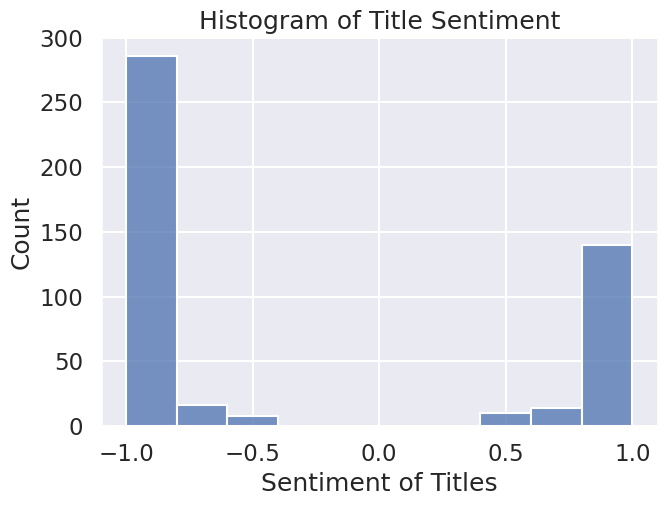

In [125]:
sns.histplot(data = aapl_news_title, x = 'title_sentiment')
plt.xlabel('Sentiment of Titles')
plt.title('Histogram of Title Sentiment')
plt.plot();

<!-- BEGIN QUESTION -->

#### Analyzing

Given your understanding of the model from part **3a** (where you created sentences with a lower polarity score) are you surprised by the distribution of sentiment in the graph above? Describe what you notice about the graph and how it relates to what you learned in part **3a**.

 The news corpus primarily focuses on Apple and the sentiment scores are mostly negative, this could indicate a generally negative media portrayal or prevalent public sentiment about Apple during the period covered by the data. Such a sentiment distribution can influence public perception, investor behavior, and market dynamics, especially if the sentiment expressed in influential outlets like Bloomberg is predominantly negative.

<!-- END QUESTION -->

<br>

---
### Continued Visualizing
Let's continue to explore `aapl_news_title` using data visualization. If you run the cell below, we add a new column `'date'` to `aapl_news_title` which concatenates the Year, Month, and Day columns into one column in `datetime` format. This format will help when it comes to visualization.

In [126]:
# Map the month names to numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
# Apply the mapping to the Month column
aapl_news_title['Month'] = aapl_news_title['Month'].map(month_map)
# Ensure Year, Month, and Day are all strings
aapl_news_title['Year'] = aapl_news_title['Year'].astype(str)
aapl_news_title['Month'] = aapl_news_title['Month'].astype(str)
aapl_news_title['Day'] = aapl_news_title['Day'].astype(str)

# Combine the columns into a single date string in 'YYYY-MM-DD' format
aapl_news_title['date_str'] = aapl_news_title['Year'] + '-' + aapl_news_title['Month'] + '-' + aapl_news_title['Day']

# Convert the combined string to a datetime object using pd.to_datetime()
aapl_news_title['date'] = pd.to_datetime(aapl_news_title['date_str'], format='%Y-%m-%d', errors='coerce')



We created a line plot to visualize the change in sentiment in `aapl_news_title` over time, using `sns.lineplot` to plot `date` as the x-axis and `title_sentiment` as the y-axis. Run the cell below to display the plot.

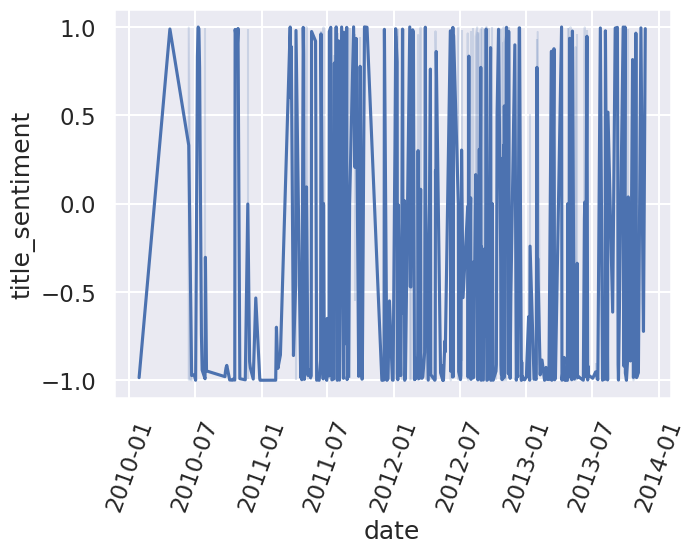

In [127]:
sns.lineplot(data = aapl_news_title, x = 'date', y = 'title_sentiment')
plt.xticks(rotation=70);

**This plot is not very pretty!** This isn't because of any errors on your part, instead, the graph tells us that we might need to use a different visualization method to understand our data, which we'll do below!

<!-- BEGIN QUESTION -->

### Question 3d

Let's find a better way to visualize our data. We can still use `sns.lineplot`, but instead of graphing every single row, let's find a way to aggregate our data.
1. Using `pd.groupby` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) find the average sentiment of every year-month pair in `aapl_news_title`.
2. Store the result in `monthly_avg_sentiment`.
3. Add a column `'date'` that holds the datetime objects for each Year-Month.
4. Run the cell to plot the averages.

**Hint**: For step 3, you may find `pd.to_datetime` helpful. Because this function requires a Day in addition to Month and Year to create datetime objects, you will need to manually `.assign(Day=1)` to set the day to the first day of the month.

Your graph should look similar to the one below:

<img src = "images/sentiment_graph.png" width = "400">

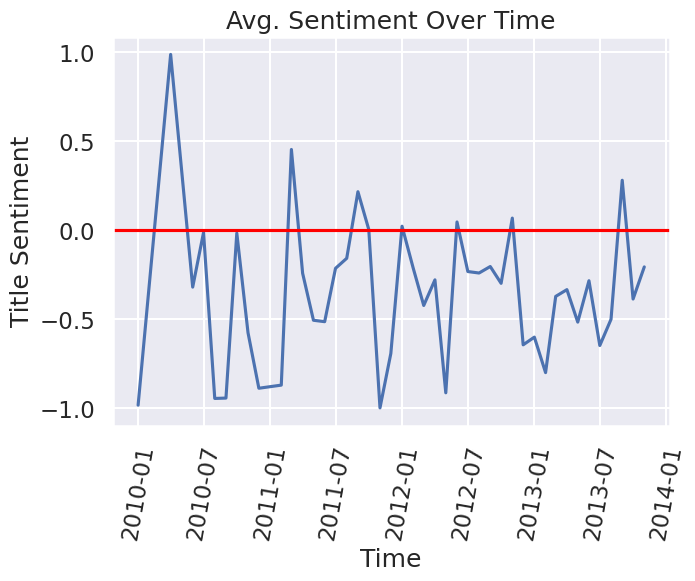

In [148]:
monthly_avg_sentiment = aapl_news_title.groupby(["Month", "Year"])["title_sentiment"].mean().reset_index()
monthly_avg_sentiment['date'] = pd.to_datetime(monthly_avg_sentiment["Year"].astype(str) + "-" + monthly_avg_sentiment["Month"].astype(str) + "-1")

# If the above are implemented correctly, running this cell should produce the graph shown above.

sns.lineplot(data = monthly_avg_sentiment, x = 'date', y = 'title_sentiment');
plt.title('Avg. Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Title Sentiment')
plt.axhline(0, color='red')
plt.xticks(rotation = 80);

This graph is a lot easier for us to read! Looking at the graph, it seems that the number of headlines mentioning Apple or AAPL with positive sentiments decreased from 2010 to early 2012, during which point sentiment remained consistently low. We see that the sentiment begins to increase again in late 2013. This could perhaps relate to the drop and subsequent uptick in Apple's stock trends that we saw in Question 2. Here is the graph below:

<img src = "images/aapl_stock.jpg" width = "400">

<!-- END QUESTION -->

<br>

---
### Question 3e

Let's audit some of our data to better understand how the sentiment analysis model works with our dataset. This is common practice when working with models! It's good practice to compare our own assumptions to the conclusions our model is drawing to ensure we're using the correct model for our tasks.

#### Question 3e, Part i

Let's look into the titles of the articles a bit more closely. Assign `top_positive` and `top_negative` to dataframes containing the five sentences with the highest `title_sentiment` and the five sentences with the lowest `title_sentiment` respectively. The dataframes should have the columns `title` and `title_sentiment`.

In [158]:
top_positive = aapl_news_title.sort_values(by = "title_sentiment", ascending = False)[["title", "title_sentiment"]].head(5)
top_negative = aapl_news_title.sort_values(by = "title_sentiment", ascending = True)[["title", "title_sentiment"]].head(5)

display(top_positive, top_negative)

,title,title_sentiment
id,,
23913265,apple’s ios 7 is a potent upgrade: rich jaroslovsky,0.999758
6129991,"smart balance, apple, summit: intellectual property",0.999724
88792887,linear technology ahead of apple in ranking of most profitable companies,0.999680
47969077,apple’s latest iphone set to become best-selling gadget,0.999634
72640002,"apple tops $400, chases exxon as world’s most valuable company",0.999537


,title,title_sentiment
id,,
76693317,one way apple is as lame as nokia,-0.999809
48905070,"microsoft phone chief says apple ios ‘boring,’ android ‘a mess’",-0.999808
8876949,google’s android fails among businesses where apple leads,-0.999770
51528077,apple ceo ‘extremely sorry’ for iphone maps frustration,-0.999761
53508664,apple’s $145 billion in cash fails to win aaa debt rating,-0.999756


In [159]:
grader.check("q3ei")

q3ei results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 3e, Part ii

Do you agree with the current sentiment-based ordering of headlines, or would you rearrange the ordering? Do you feel that the DistilBERT model is a good model for our task of analyzing sentiment in news headlines?

**Current sentiment-based ordering** The headlines that carry a higher positive sentiment tend to highlight Apple’s technological advancements and product launches. Titles such as “Apple’s iOS 7 is a potent upgrade: rich Jaroslovsky” and “Apple’s latest iPhone set to become best-selling gadget” reflect excitement and approval of technological innovation and new product offerings. These articles likely focus on the innovative aspects of Apple’s products, emphasizing enhancements and new features that resonate well with consumers and tech enthusiasts. This kind of positive press typically boosts public perception of Apple as a leader in innovation. On the flip side, the negative sentiments are prominently tied to Apple’s financial aspects or controversial business decisions. Examples include “Apple’s $145 billion in cash fails to win aaa debt rating” and “Apple CEO ‘extremely sorry’ for iPhone maps frustration.” These articles may discuss financial challenges, market performance concerns, or backlash against corporate decisions, which tend to evoke criticism or concern from investors, analysts, and the general public. The financial narratives often carry a tone of skepticism or disappointment, contrasting sharply with the positive reception of Apple’s technological updates.


**DistilBERT** The model might benefit from recalibration or fine-tuning with a more balanced or specific dataset tailored to the kind of sentiment nuances found in financial or corporate news. It’s essential to continually assess for any bias, especially in sentiment polarity. News headlines about corporations can be subtly biased by the choice of words even without overt positive or negative language. In conclusion, the DistilBERT model does seem like a good fit for analyzing sentiment in news headlines due to its balance of efficiency and accuracy. However, like any model, its performance can always be enhanced by refining the training process, the dataset used, or by integrating additional contextual or linguistic features to improve its sensitivity to subtler sentiments.

<!-- END QUESTION -->

### Takeaways

In this homework, we used an LLM to evaluate the sentiment of news articles quantify text data (qualitative data) so that we could perform data analysis on a large set of journalism data. We were able to see how news articles reflected trends seen in the stock market through the sentiment of the headlines. Though we used the [HuggingFace DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english) model, there are thousands of NLP models available for use, and with rapid innovations in the NLP research space, there are new models frequently being created. In fact, we were using a different model for this homework one year ago, which reflects how quickly the NLP field progresses. 

Different models evaluate sentiment differently. You may have noticed that the DistilBERT model struggles with evaluating neutral sentences and often gives sentences a high polarity score. When evaluating which models to use in your projects, it's useful to test them on small inputs of data to see how they perform, like we did by testing out various sentences! Different models may perform differently (often due to how the model was trained and created) so it's important to understand these differences when deciding what model to use for your data.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Missy says congratulations! You have finished Homework 3!

<img src = "images/missy.jpg" width = "200">

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSe0fBEJwt6aEfZxU3fh3llNk8rSWHj6Umq0km3wPqmFu0MlGA/viewform). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 3 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 3 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

**Important**: Please check that your written responses were generated and submitted correctly to the HW 3 Written Assignment.

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 3 written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [160]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q2ai results: All test cases passed!

    q2aii results: All test cases passed!

    q2b results: All test cases passed!

    q2c results: All test cases passed!

    q3a results: All test cases passed!

    q3bi results: All test cases passed!

    q3bii results: All test cases passed!

    q3ei results: All test cases passed!
